In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# load dataset

In [2]:
from sklearn.datasets import fetch_california_housing
california_house = fetch_california_housing() 

In [3]:
california_house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# print entire information : 
print(california_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(california_house.feature_names) 

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print(california_house.target) 

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


## preparing dataset

In [7]:
house_df = pd.DataFrame(california_house.data , columns = [california_house.feature_names] ) 
house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
house_df['Price'] = california_house.target
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (MedInc,)      20640 non-null  float64
 1   (HouseAge,)    20640 non-null  float64
 2   (AveRooms,)    20640 non-null  float64
 3   (AveBedrms,)   20640 non-null  float64
 4   (Population,)  20640 non-null  float64
 5   (AveOccup,)    20640 non-null  float64
 6   (Latitude,)    20640 non-null  float64
 7   (Longitude,)   20640 non-null  float64
 8   (Price,)       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
import seaborn as sns

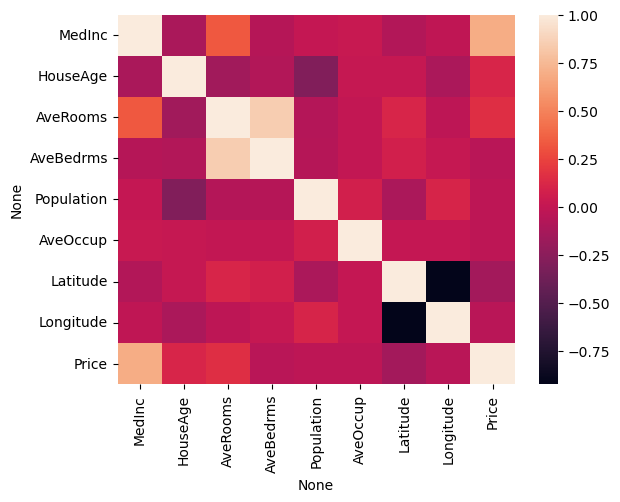

In [12]:
sns.heatmap(house_df.corr()) 
plt.show()

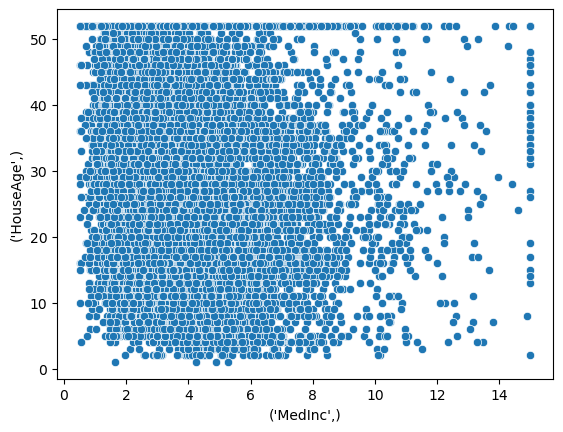

In [13]:
sns.scatterplot(x = house_df.iloc[:,0] , y = house_df.iloc[:,1]) 
plt.show()

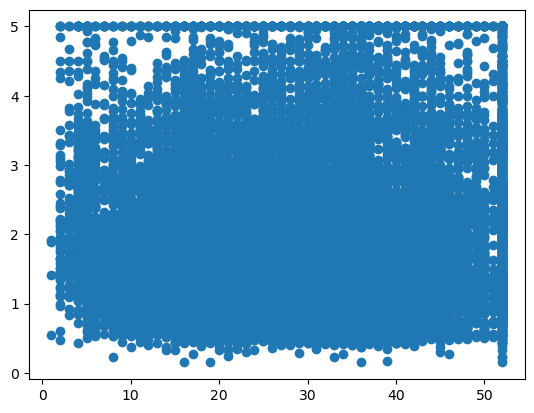

In [14]:
plt.scatter(x = house_df['HouseAge'] , y = house_df["Price"])

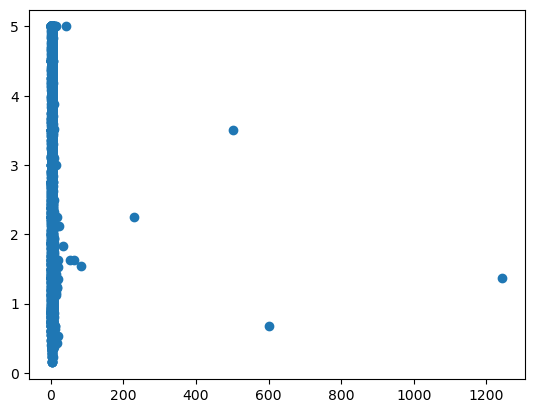

In [15]:
plt.scatter(x = house_df['AveOccup'] , y = house_df["Price"])

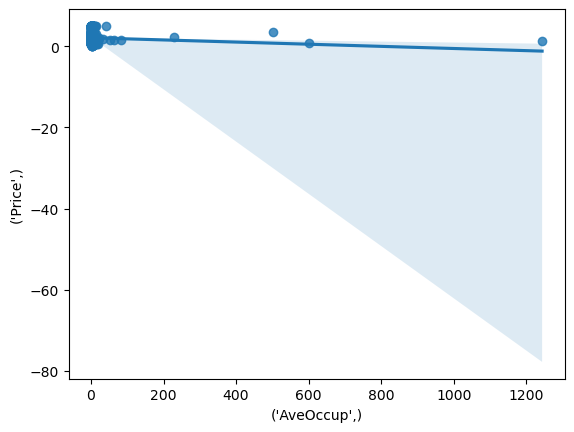

In [16]:
sns.regplot(x = 'AveOccup' , y = 'Price' , data = house_df)
plt.show()

<Axes: xlabel="('HouseAge',)", ylabel="('Price',)">

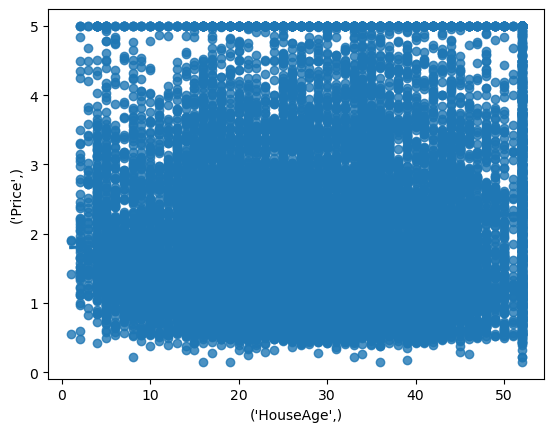

In [17]:
sns.regplot(x = 'HouseAge' , y = 'Price' , data = house_df)

In [18]:
# Devide the feature into the dependendt and independent features.. 

X = house_df.iloc[:,:-1] 
y = house_df.iloc[:,-1] 

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42) 
X_train.shape  , y_train.shape

((14448, 8), (14448,))

In [21]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Model Training 

In [22]:
from sklearn.linear_model import LinearRegression 
linear_reg_model = LinearRegression() 

In [23]:
linear_reg_model.fit(X_train_scaled , y_train) 

LinearRegression()

In [24]:
print(linear_reg_model.coef_) 
print('-'*20) 
print(linear_reg_model.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
--------------------
2.0692396089424165


In [25]:
linear_reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
# prediction with test 

reg_pred = linear_reg_model.predict(X_test_scaled) 
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [27]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: (Price,), Length: 6192, dtype: float64

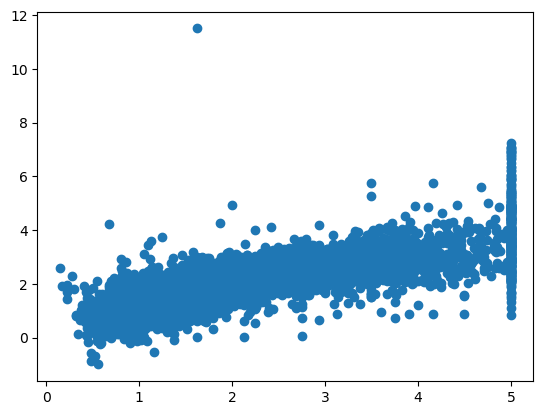

In [28]:
# plot a scatter plot for the prediction : 

plt.scatter(y_test , reg_pred)  
plt.show()

In [29]:
# residules 
residules = y_test - reg_pred 
residules

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: (Price,), Length: 6192, dtype: float64

<Axes: xlabel="('Price',)", ylabel='Count'>

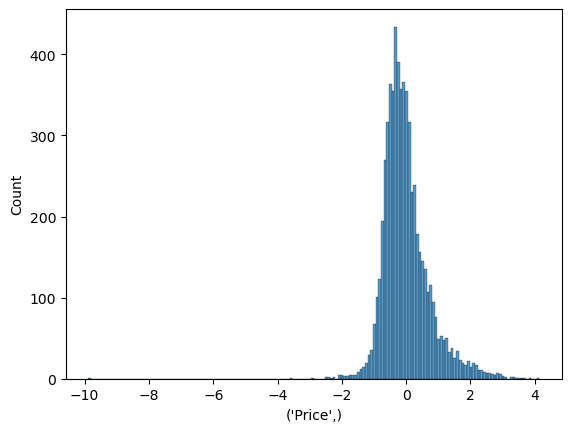

In [30]:
sns.histplot(residules)

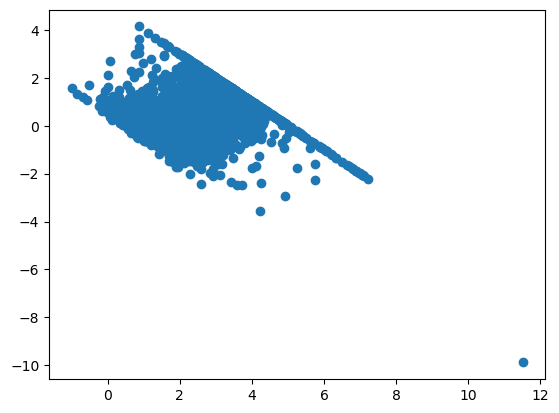

In [31]:
# prediction and residual : 
plt.scatter(reg_pred , residules) 

In [32]:
#performace metrics : 
from sklearn.metrics import mean_absolute_error , mean_squared_error 

print(mean_squared_error(y_test , reg_pred) )
print(mean_absolute_error(y_test,reg_pred) )
print(np.sqrt(mean_squared_error(y_test , reg_pred)))  # root mean square errored 

0.5305677824766752
0.5272474538305953
0.7284008391515452


In [33]:
# R Square and Adjusted R square method.. 

R2 = 1 - sum square error / sum of total error 

adj R2 = 1 - [(1-R2)*(n-1) / (n-k-1) ] 

whare n: number of observations (samples).                                                                         
k: number of features present in data 

In [34]:
from sklearn.metrics import r2_score  # it means it gives the 59 % accuracy
r2 = r2_score(y_test , reg_pred )
print(r2) 

0.5957702326061665


In [35]:
n = X_test.shape[0] 
k = X_test.shape[1] 

adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))
adj_r2

0.5952472117200027

# Pickle the model file for Deployment

In [36]:
import pickle 

In [37]:
# pickle.dump(linear_reg_model , open('regression_model.pkl' ,'wb')) 
# pickle.dump(scaler , open('scaler.pkl' ,'wb')) 
# pickle.dump(house_df,open('house_dataset.pkl','wb'))

In [38]:
predictor = pickle.load(open('regression_model.pkl','rb')) 

In [45]:
house_df.iloc[0 , :-1].values.reshape(1,-1) # 1 sample. with 9 features.. 

(1, 9)

In [78]:
predictor.predict(scaler.transform(house_df.iloc[0,:-1].values.reshape(1,-1)))

array([4.14333441])

In [48]:
dataset = pickle.load(open('house_dataset.pkl','rb')) 

In [49]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
scaler = pickle.load(open('scaler.pkl','rb')) 

In [77]:
dataset.iloc[0,:-1].values.reshape(1 ,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])